In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random

In [48]:
df = pd.read_csv("heart_cleaned_v1.csv")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    int64  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.1+ KB


In [50]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [51]:
df = df.rename(columns = {'RestingBP':'blood_pressure_while_resting'})

In [52]:
df = df.rename(columns = {'FastingBS':'blood_sugar_while_fasting'})

In [53]:
df = df.rename(columns = {'MaxHR':'maximum_heart_rate'})

In [54]:
df = df.rename(columns = {'Oldpeak':'oldpeak_of_st'})

In [55]:
df = df.rename(columns = {'Cholesterol':'cholesterol'})

In [56]:
'''Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
BP_while_resting: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
Bloos_sugar_while_fasting: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
maximum_heart_rate: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal'''

"Age: age of the patient [years]\nSex: sex of the patient [M: Male, F: Female]\nChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]\nBP_while_resting: resting blood pressure [mm Hg]\nCholesterol: serum cholesterol [mm/dl]\nBloos_sugar_while_fasting: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]\nRestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]\nmaximum_heart_rate: maximum heart rate achieved [Numeric value between 60 and 202]\nExerciseAngina: exercise-induced angina [Y: Yes, N: No]\nOldpeak: oldpeak = ST [Numeric value measured in depression]\nST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]\nHeartDisease: output class [1: heart disease, 0: Normal"

In [57]:
df

,Age,Sex,ChestPainType,blood_pressure_while_resting,cholesterol,blood_sugar_while_fasting,RestingECG,maximum_heart_rate,ExerciseAngina,oldpeak_of_st,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
913,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
914,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
915,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

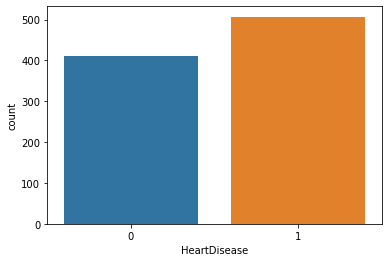

In [58]:
sns.countplot(data = df, x = 'HeartDisease')

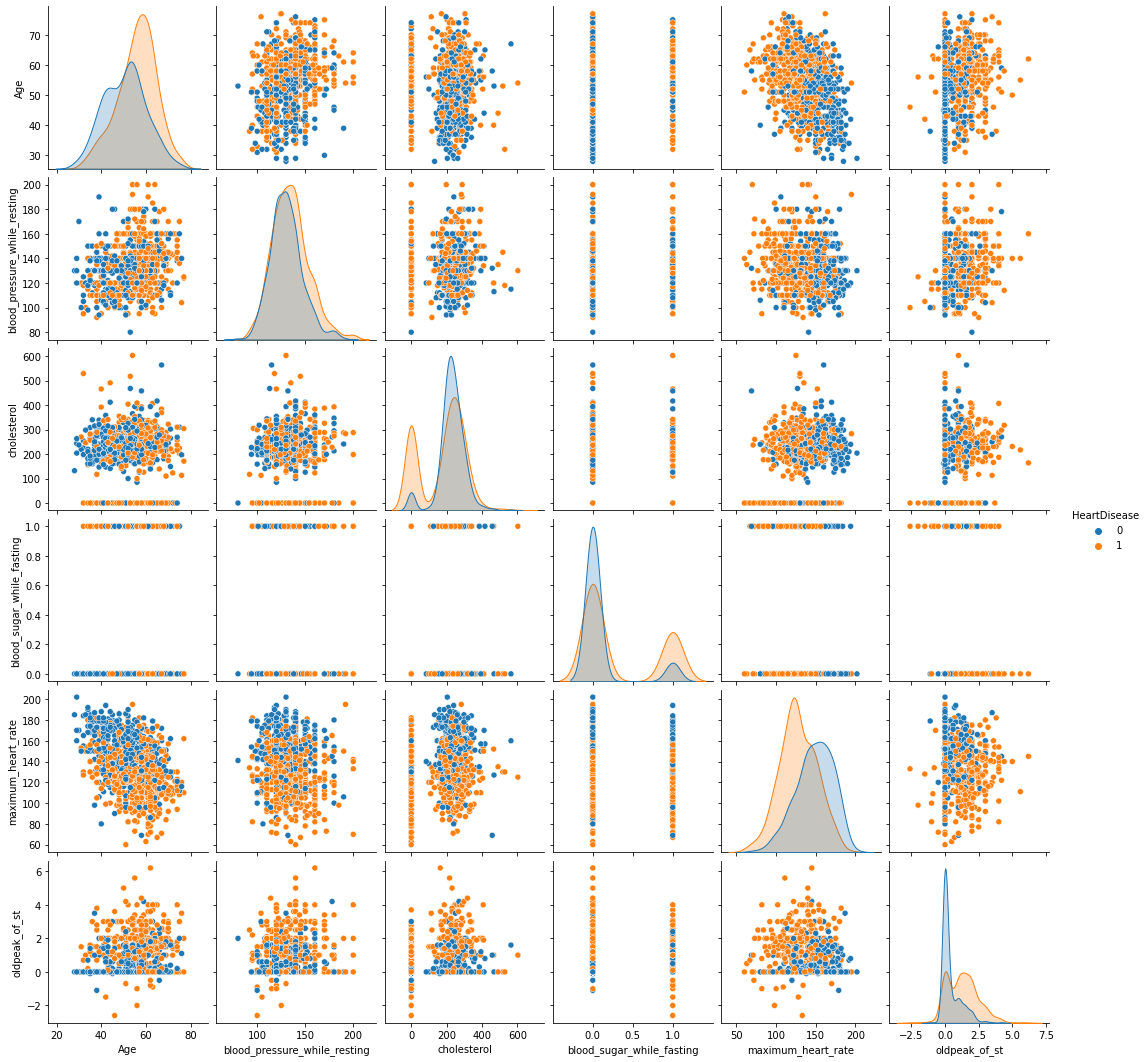

In [59]:
sns.pairplot(df,hue='HeartDisease')

(array([ 12.,  37.,  86., 104., 148., 200., 175., 101.,  39.,  15.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <BarContainer object of 10 artists>)

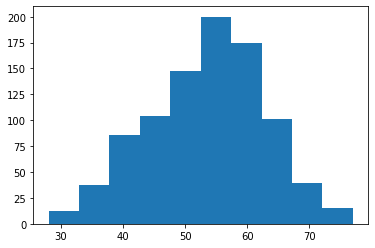

In [60]:
plt.hist(df['Age'])

<AxesSubplot:xlabel='cholesterol', ylabel='Count'>

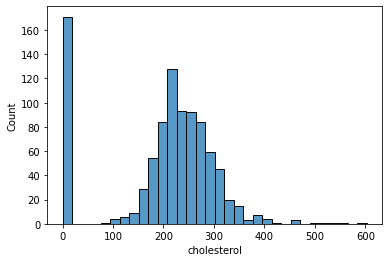

In [61]:
sns.histplot(df['cholesterol'])

In [63]:
df['cholesterol'].describe()

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: cholesterol, dtype: float64

In [65]:
mean=df['cholesterol'].mean()
count=-1
for i in df['cholesterol']:
    count+=1
    if i==0:
        df['cholesterol'][count] = float(mean + random.randint(-100,100))

<ipython-input-65-4f8328005721>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cholesterol'][count] = float(mean + random.randint(-100,100))


<AxesSubplot:xlabel='cholesterol', ylabel='Count'>

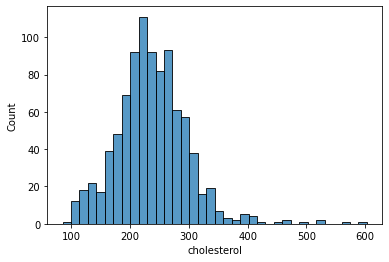

In [67]:
sns.histplot(df['cholesterol'])

<AxesSubplot:xlabel='oldpeak_of_st', ylabel='Count'>

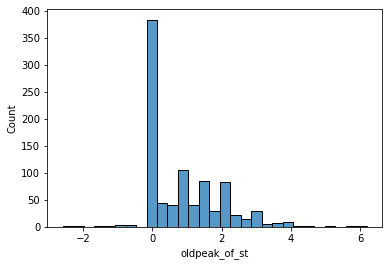

In [68]:
sns.histplot(df['oldpeak_of_st'])

<AxesSubplot:xlabel='oldpeak_of_st'>

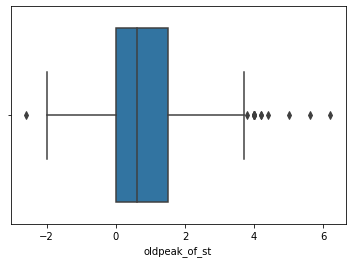

In [85]:
sns.boxplot(data=df,x='oldpeak_of_st')

(array([703.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 214.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

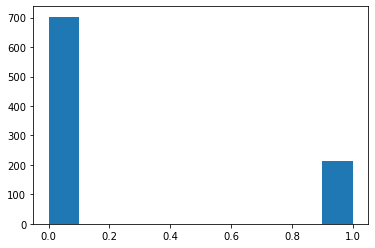

In [69]:
plt.hist(df['blood_sugar_while_fasting'])

In [70]:
corr=df.corr()

In [71]:
corr

,Age,blood_pressure_while_resting,cholesterol,blood_sugar_while_fasting,maximum_heart_rate,oldpeak_of_st,HeartDisease
Age,1.000000,0.263084,0.014182,0.198170,-0.382280,0.258563,0.282012
blood_pressure_while_resting,0.263084,1.000000,0.105581,0.067823,-0.109693,0.174252,0.117990
cholesterol,0.014182,0.105581,1.000000,-0.058747,0.068357,0.047016,0.005759
blood_sugar_while_fasting,0.198170,0.067823,-0.058747,1.000000,-0.131067,0.053062,0.267994
maximum_heart_rate,-0.382280,-0.109693,0.068357,-0.131067,1.000000,-0.161213,-0.401410
oldpeak_of_st,0.258563,0.174252,0.047016,0.053062,-0.161213,1.000000,0.403638
HeartDisease,0.282012,0.117990,0.005759,0.267994,-0.401410,0.403638,1.000000


<AxesSubplot:>

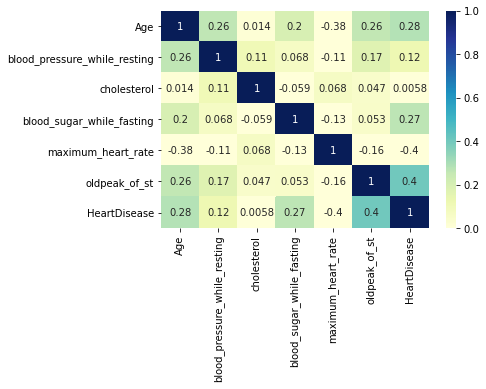

In [72]:
sns.heatmap(corr,annot=True,vmin=0,vmax=1,cmap='YlGnBu')

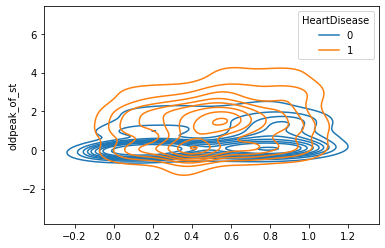

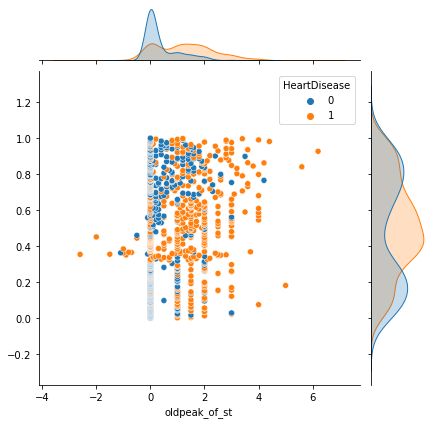

In [94]:
sns.kdeplot(y=df['oldpeak_of_st'],x=np.arange(0, 1, 1/917),hue=df['HeartDisease'])
sns.jointplot(x=df['oldpeak_of_st'],y=np.arange(0, 1, 1/917),hue=df['HeartDisease'])

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

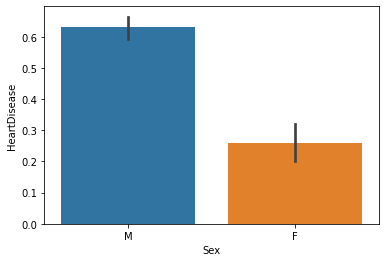

In [95]:
sns.barplot(data=df,x='Sex',y='HeartDisease')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


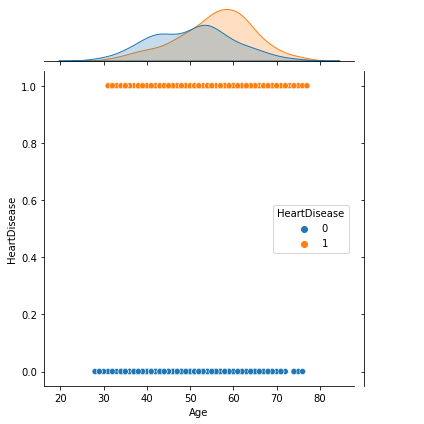

In [96]:
sns.jointplot(data=df,x= df.Age,y=df.HeartDisease,hue=df.HeartDisease)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

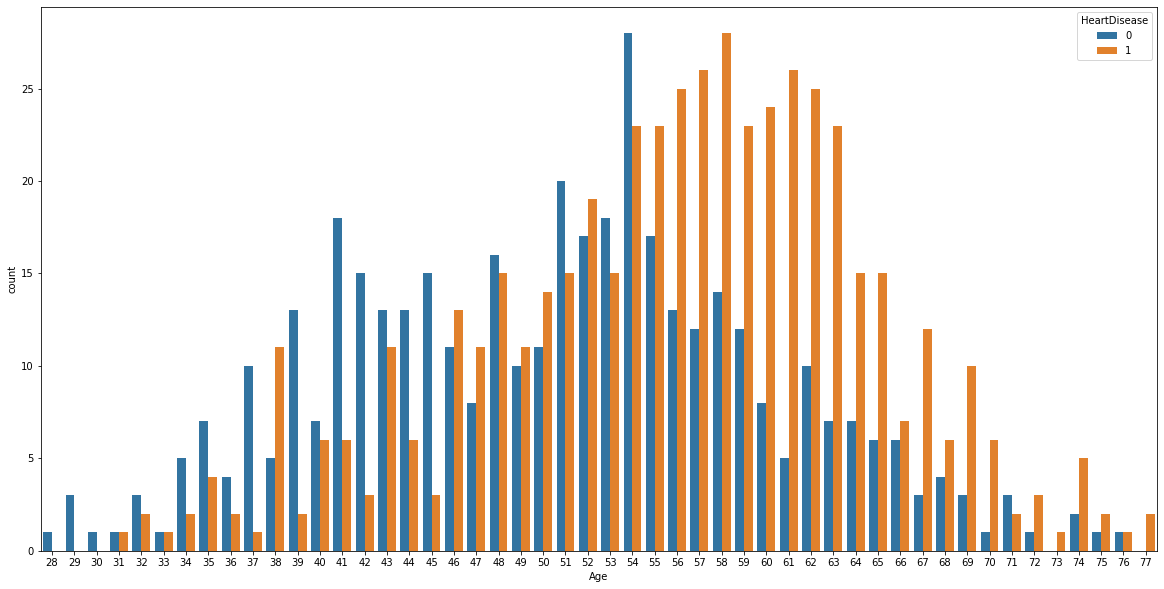

In [97]:
plt.figure(figsize=(20,10))
sns.countplot(df.Age,hue=df.HeartDisease)

<AxesSubplot:xlabel='ExerciseAngina', ylabel='HeartDisease'>

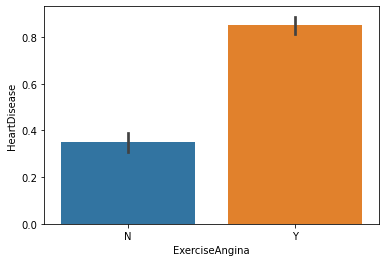

In [80]:
sns.barplot(data=df,x='ExerciseAngina',y='HeartDisease')

<AxesSubplot:xlabel='ST_Slope', ylabel='HeartDisease'>

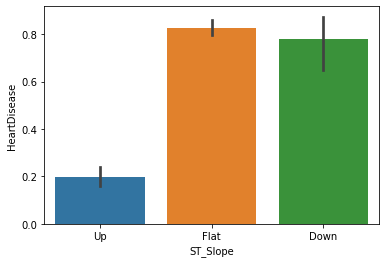

In [81]:
sns.barplot(data=df,x='ST_Slope',y='HeartDisease')

<AxesSubplot:xlabel='RestingECG', ylabel='HeartDisease'>

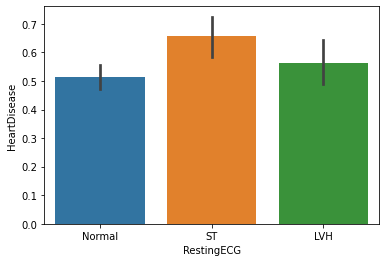

In [82]:
sns.barplot(data=df,x='RestingECG',y='HeartDisease')

<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

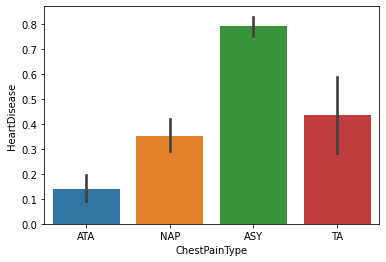

In [83]:
sns.barplot(data=df,x='ChestPainType',y='HeartDisease')

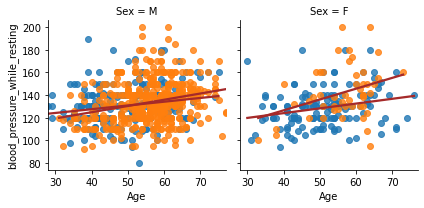

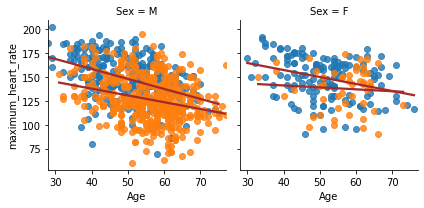

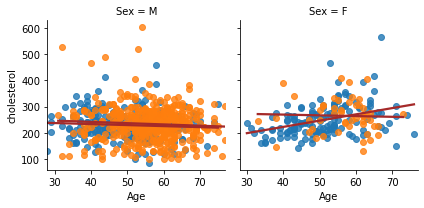

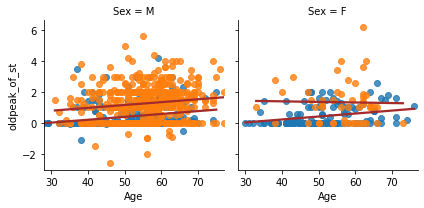

In [99]:
g = sns.FacetGrid(df,col="Sex",hue='HeartDisease')
g.map(sns.regplot,'Age','blood_pressure_while_resting',ci=None,line_kws = {'color': 'brown'})
g = sns.FacetGrid(df,col="Sex",hue='HeartDisease')
g.map(sns.regplot,'Age','maximum_heart_rate',ci=None,line_kws = {'color': 'brown'})
g = sns.FacetGrid(df,col="Sex",hue='HeartDisease')
g.map(sns.regplot,'Age','cholesterol',ci=None,line_kws = {'color': 'brown'})
g = sns.FacetGrid(df,col="Sex",hue='HeartDisease')
g.map(sns.regplot,'Age','oldpeak_of_st',ci=None,line_kws = {'color': 'brown'})

<AxesSubplot:xlabel='blood_sugar_while_fasting', ylabel='HeartDisease'>

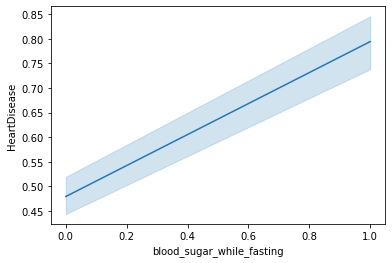

In [101]:
sns.lineplot(data=df,x='blood_sugar_while_fasting',y='HeartDisease')